<a href="https://colab.research.google.com/github/federiconarracci/WBS-test/blob/main/Kelso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

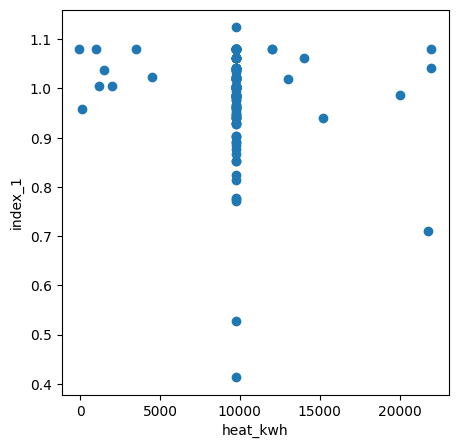

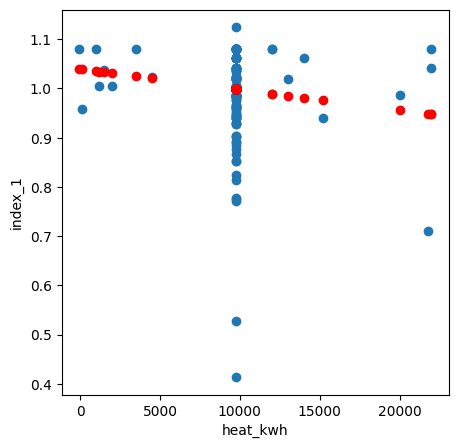

Mean Absolute Error: 0.057970709399724235
Mean Squared Error: 0.005429264517300764
Root Mean Squared Error: 0.07368354305610422
Coefficients: [ 8.35959774e-04 -1.02687046e-06]
Intercept: 0.9974322035047639


In [3]:
#libraries download
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# main df
qu = pd.read_csv('Questionnaire.csv')
qu = pd.DataFrame(qu).reset_index(drop=True)

# replace -99 value in the indicated parameters
qu["v_59_2"] = qu["v_59_2"].replace(-99,float('NaN'))
qu["v_60_2"] = qu["v_60_2"].replace(-99, float('NaN'))
qu["v_70_2"] = qu["v_70_2"].replace(-99, float('NaN'))
qu["v_71_2"] = qu["v_71_2"].replace(-99, float('NaN'))

# creation of binary variables
qu['low_non'] = (qu['income_range'] == 'Low' ) & (qu['v_4_1'] == 2 )
qu['low_alone'] = (qu['income_range'] == 'Low') & (qu['v_5_1'] == 1 )
qu['low_together'] = (qu['income_range'] == 'Low') & (qu['v_7_1'] == 2 )
qu['low_rec'] = (qu['income_range'] == 'Low') & (qu['v_7_1'] == 1 )
qu['med_non'] = (qu['income_range'] == 'Medium') & (qu['v_4_1'] == 2 )
qu['med_alone'] = (qu['income_range'] == 'Medium') & (qu['v_5_1'] == 1 )
qu['med_together'] = (qu['income_range'] == 'Medium') & (qu['v_7_1'] == 2 )
qu['med_rec'] = (qu['income_range'] == 'Medium') & (qu['v_7_1'] == 1 )
qu['high_non'] = (qu['income_range'] == 'High') & (qu['v_4_1'] == 2 )
qu['high_alone'] = (qu['income_range'] == 'High') & (qu['v_5_1'] == 1 )
qu['high_together'] = (qu['income_range'] == 'High') & (qu['v_7_1'] == 2 )
qu['high_rec'] = (qu['income_range'] == 'High') &  (qu['v_7_1'] == 1 )

# log transformation and new log variables
qu['v_46_1_log'] = np.log(qu['v_46_1']) + 1
qu['v_46_2_log'] = np.log(qu['v_46_2']) + 1
qu['v_46_3_log'] = np.log(qu['v_46_3']) + 1
qu['v_46_4_log'] = np.log(qu['v_46_4']) + 1
qu['v_46_5_log'] = np.log(qu['v_46_5']) + 1
qu['v_45_1_log'] = np.log(qu['v_45_1']) + 1
qu['v_45_2_log'] = np.log(qu['v_45_2']) + 1
qu['v_45_3_log'] = np.log(qu['v_45_3']) + 1
qu['v_45_4_log'] = np.log(qu['v_45_4']) + 1
qu['v_45_5_log'] = np.log(qu['v_45_5']) + 1
qu['v_45_6_log'] = np.log(qu['v_45_6']) + 1
qu['v_45_7_log'] = np.log(qu['v_45_7']) + 1

# df for index_1_log
qu_log_l1 = qu.filter(['v_46_1_log',
                      'v_46_2_log',
                      'v_46_3_log',
                      'v_46_4_log',
                      'v_46_5_log'],
                     axis=1)
qu_log_1 = pd.DataFrame(qu_log_l1).reset_index(drop=True)

# index_1_log generation
qu_log_1.loc['mean']= qu_log_1.iloc[0:149].mean()
qu_log_1['r_tot'] = qu_log_1.sum(axis=1)
qu_log_1['index_1_log'] = qu_log_1['r_tot'] / qu_log_1['r_tot'].loc['mean']
qu_log_1 = qu_log_1.iloc[0:150]

# check for NaN values per index:
for ind in qu_log_1.iterrows():
  if qu_log_1.loc[:].isna().sum().sum() < 3 :
    qu_log_1['index_1_log']
  else:
    qu_log_1['index_1_log'].replace(float('NaN'))

# df for index_2_log
qu_log_2 = qu.filter(['v_45_1_log',
                      'v_45_2_log',
                      'v_45_3_log',
                      'v_45_4_log',
                      'v_45_5_log',
                      'v_45_6_log',
                      'v_45_7_log'],
                     axis=1)
qu_log_2 = pd.DataFrame(qu_log_2).reset_index(drop=True)


# index_2_log generation
qu_log_2.loc['mean']= qu_log_2.iloc[0:149].mean()
qu_log_2['r_tot'] = qu_log_2.sum(axis=1)
qu_log_2['index_2_log'] = qu_log_2['r_tot'] / qu_log_2['r_tot'].loc['mean']
qu_log_2 = qu_log_2.iloc[0:150]

# check for NaN values per index:
for ind in qu_log_2.iterrows():
  if qu_log_2.loc[:].isna().sum().sum() < 3 :
    qu_log_2['index_2_log']
  else:
    qu_log_2['index_2_log'].replace(float('NaN'))

# additional variables
qu['elec_s'] = qu["v_59_2"].replace(-99, float('NaN'))
qu['heat_s'] = qu["v_60_2"].replace(-99, float('NaN'))
qu['elec_kwh'] = qu["v_70_2"].replace(-99, float('NaN'))
qu["heat_kwh"] = qu["v_71_2"].replace(-99, float('NaN'))

# numerization of True/False values
qu = qu.replace({True: 1, False: 0})

# appending index_1_log to main df
qu['index_1'] = qu_log_1['index_1_log']

# LR / MLR variables definition
ind = 'heat_kwh'
ind2 = 'v_2_1'
tar = 'index_1'
feat = 'elec_kwh'

# df for LR
qu_R = qu[[ind, tar]].copy()
mean_ind = qu_R[ind].mean()
qu_R[ind].fillna(value=mean_ind,inplace=True)

# featured variables
X = qu_R[[ind]]
Y = qu_R[tar]

# plot
plt.figure(figsize=(5,5))
plt.scatter(qu_R[ind], qu_R[tar])
plt.title('')
plt.xlabel(ind)
plt.ylabel(tar)

# LR sets + model + fit
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
Pre = linear_model.LinearRegression()
Pre.fit(X_train, Y_train)

# plot
plt.figure(figsize=(5,5))
plt.scatter(qu_R[ind],qu_R[tar])
plt.scatter(X,Pre.predict(X), c='Red')
plt.title('')
plt.xlabel(ind)
plt.ylabel(tar)
plt.show()

# df for MLR
qu_R2 = qu[[ind2, tar, feat]].copy()
mean_ind2 = qu_R2[ind2].mean()
qu_R2[ind2].fillna(value=mean_ind2,inplace=True)
mean_feat = qu_R2[feat].mean()
qu_R2[feat].fillna(value=mean_feat,inplace=True)
qu_R2

# featured variables
X2 = qu_R2[[ind2, feat]]
Y2 = qu_R2[tar]

# MLR sets + model + fit
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)
Pre2 = LinearRegression()
Pre2.fit(X2_train, Y2_train)

# prediction
Y2_pred = Pre2.predict(X2_test)

# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(Y2_test, Y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y2_test, Y2_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y2_test, Y2_pred, squared=False))
print('Coefficients:', Pre2.coef_)
print('Intercept:', Pre2.intercept_)